## Тема “Обучение без учителя”

### Задание 1
Импортируйте библиотеки pandas, numpy и matplotlib.
Загрузите "Boston House Prices dataset" из встроенных наборов данных библиотеки sklearn.
Создайте датафреймы X и y из этих данных.
Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test)
с помощью функции train_test_split так, чтобы размер тестовой выборки
составлял 20% от всех данных, при этом аргумент random_state должен быть равен 42.
Масштабируйте данные с помощью StandardScaler.
Постройте модель TSNE на тренировочный данных с параметрами:
n_components=2, learning_rate=250, random_state=42.
Постройте диаграмму рассеяния на этих данных.

#### Импортирую библиотеки, загружаю датасет Бостон, создаю датафреймы X и y

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.datasets import load_boston

boston = load_boston()

X = pd.DataFrame(boston.data, columns=boston.feature_names)
y = boston.target

#### Создаю тренировочные и тестовые датасеты

In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Стандартизирую данные

In [4]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

#### Строю модель TSNE на тренировочных данных

In [5]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, learning_rate=250, random_state=42)

X_train_tsne = tsne.fit_transform(X_train_scaled)

#### Строю диаграмму рассеивания данных, полученных с помощью модели

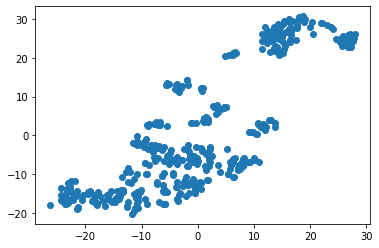

In [6]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1])

plt.show()

#### Сохраняю датафреймы в pkl файлы для Задания 2

In [7]:
X_train.to_pickle("pkl_files/X_train.pkl")
X_train_tsne=pd.DataFrame(X_train_tsne,columns=['0','1'])
X_train_tsne.to_pickle("pkl_files/X_train_tsne.pkl")
y_train=pd.Series(y_train)
y_train.to_pickle("pkl_files/y_train.pkl")
X_test.to_pickle("pkl_files/X_test.pkl")
y_test=pd.Series(y_test)
y_test.to_pickle("pkl_files/y_test.pkl")